<a href="https://colab.research.google.com/github/Ed-Marcavage/PyTorch/blob/Exercises/Workflow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
# Create *known* parameters
weight = 0.7 # B
bias = 0.3 # A

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

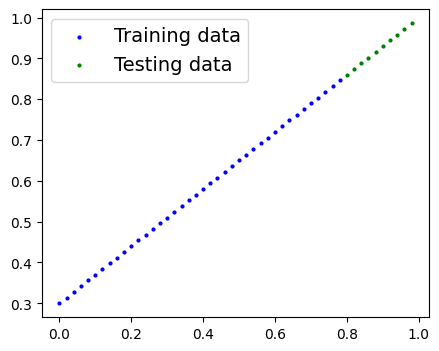

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(5, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

plot_predictions();

In [13]:
class ExerciseModel_v0(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1,dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias




In [16]:
model_0 = ExerciseModel_v0()
model_0.state_dict()

OrderedDict([('weights', tensor([0.6548])), ('bias', tensor([0.0965]))])

In [18]:
loss_fn = nn.L1Loss()
optim_fn = torch.optim.SGD(model_0.parameters(), 0.01)

In [26]:
epoch = 300

for epoch in range(epoch):
  model_0.train();

  # Forward Pass
  y_prediction = model_0(X_train)

  # Calc Loss
  loss = loss_fn(y_prediction, y_train)

  # Optimize Zero Grad
  optim_fn.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer Step
  optim_fn.step()

  # Testing mode
  model_0.eval()

  with torch.inference_mode():
    # Forward Pass
    test_prediction = model_0(X_test)

    # Calc Loss
    test_loss = loss_fn(test_prediction, y_test)

    # LEFT HERE CONFUSED WITH - "The training loop should test the model on the test dataset every 20 epochs."










